<a href="https://colab.research.google.com/github/wahyusyahputraaaa/DataMining/blob/main/Praktikum_9_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
df=pd.read_csv("/content/drive/MyDrive/Dataset/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [2]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [3]:
# calculate mean of 'person_emp_lenght'
mean_emp_length = df['person_emp_length'].mean()

# fill missing values in 'person_emp_length' column with mean value
df['person_emp_length'].fillna(mean_emp_length, inplace=True)

mean_int_rate = df['loan_int_rate'].mean()
df['loan_int_rate'].fillna(mean_int_rate, inplace=True)

<ipython-input-3-4f9c81579b5f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(mean_emp_length, inplace=True)
<ipython-input-3-4f9c81579b5f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [4]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [5]:
#Data Preprocessing
x = df.drop('loan_status', axis=1)
y = df['loan_status']

#Enccoding data kategorikal
x = pd.get_dummies(x, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

#split dataset menjadi data training dan testing
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
#standarisasi data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
# Training model
knn = KNeighborsClassifier(n_neighbors=5) #jumlah tetangga (k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

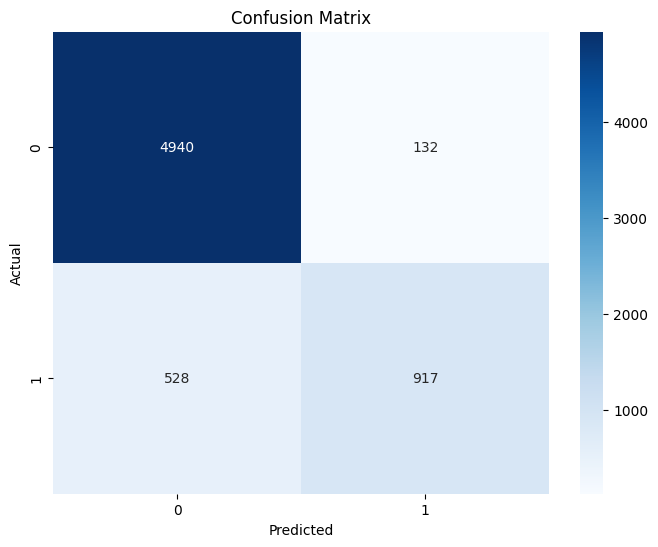

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

#melakukan prediksi
y_pred = knn.predict(x_test)

#menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

#visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

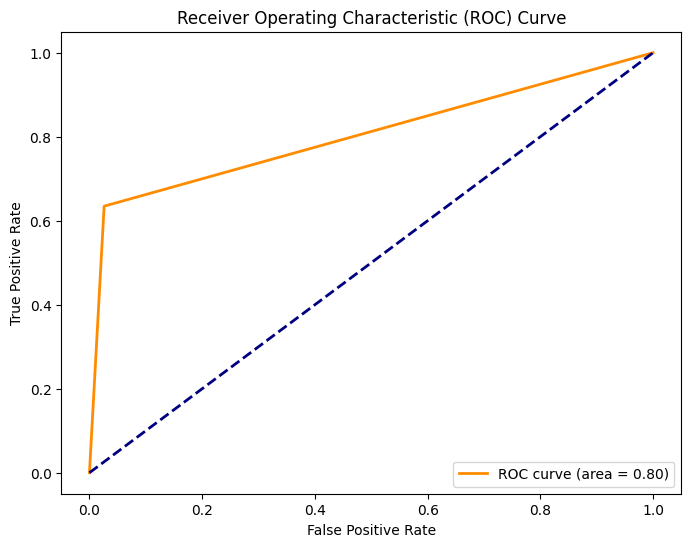

In [10]:
# menghitung nilai fase positive rate (fpr) dan  true positife rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
# evaluasi model
y_pred = knn.predict(x_test)

#confusion matrix dan classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[4940  132]
 [ 528  917]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      5072
           1       0.87      0.63      0.74      1445

    accuracy                           0.90      6517
   macro avg       0.89      0.80      0.84      6517
weighted avg       0.90      0.90      0.89      6517

